In [40]:
import numpy as np
import pandas as pd

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import os
cwd = os.getcwd()
cwd

'/data22/bde/Git/forks/Informer2020'

In [41]:
PATH = cwd
DATA = 'informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1'

In [42]:
metrics = np.load(f'{PATH}/results/{DATA}/metrics.npy')
metrics

array([ 0.16801786,  0.14218129,  0.37706935,  0.8580206 , 77.7413    ],
      dtype=float32)

In [43]:
real_prediction = np.load(f'{PATH}/results/{DATA}/real_prediction.npy')
real_prediction

array([[[-0.4559775]]], dtype=float32)

In [44]:
true = np.load(f'{PATH}/results/{DATA}/true.npy')
pred = np.load(f'{PATH}/results/{DATA}/pred.npy')

print(true.shape)
print(pred.shape)

(4864, 1, 1)
(4864, 1, 1)


In [45]:
df_true = pd.DataFrame.from_records(true)
df_true.head()

,0
0,[-0.17178985]
1,[-0.12340269]
2,[-0.109568514]
3,[-0.09841349]
4,[1.1485626]


In [46]:
df_pred = pd.DataFrame.from_records(pred)
df_pred.head()

,0
0,[-0.2835306]
1,[0.12824212]
2,[0.0016261823]
3,[-0.029966105]
4,[-0.02332304]


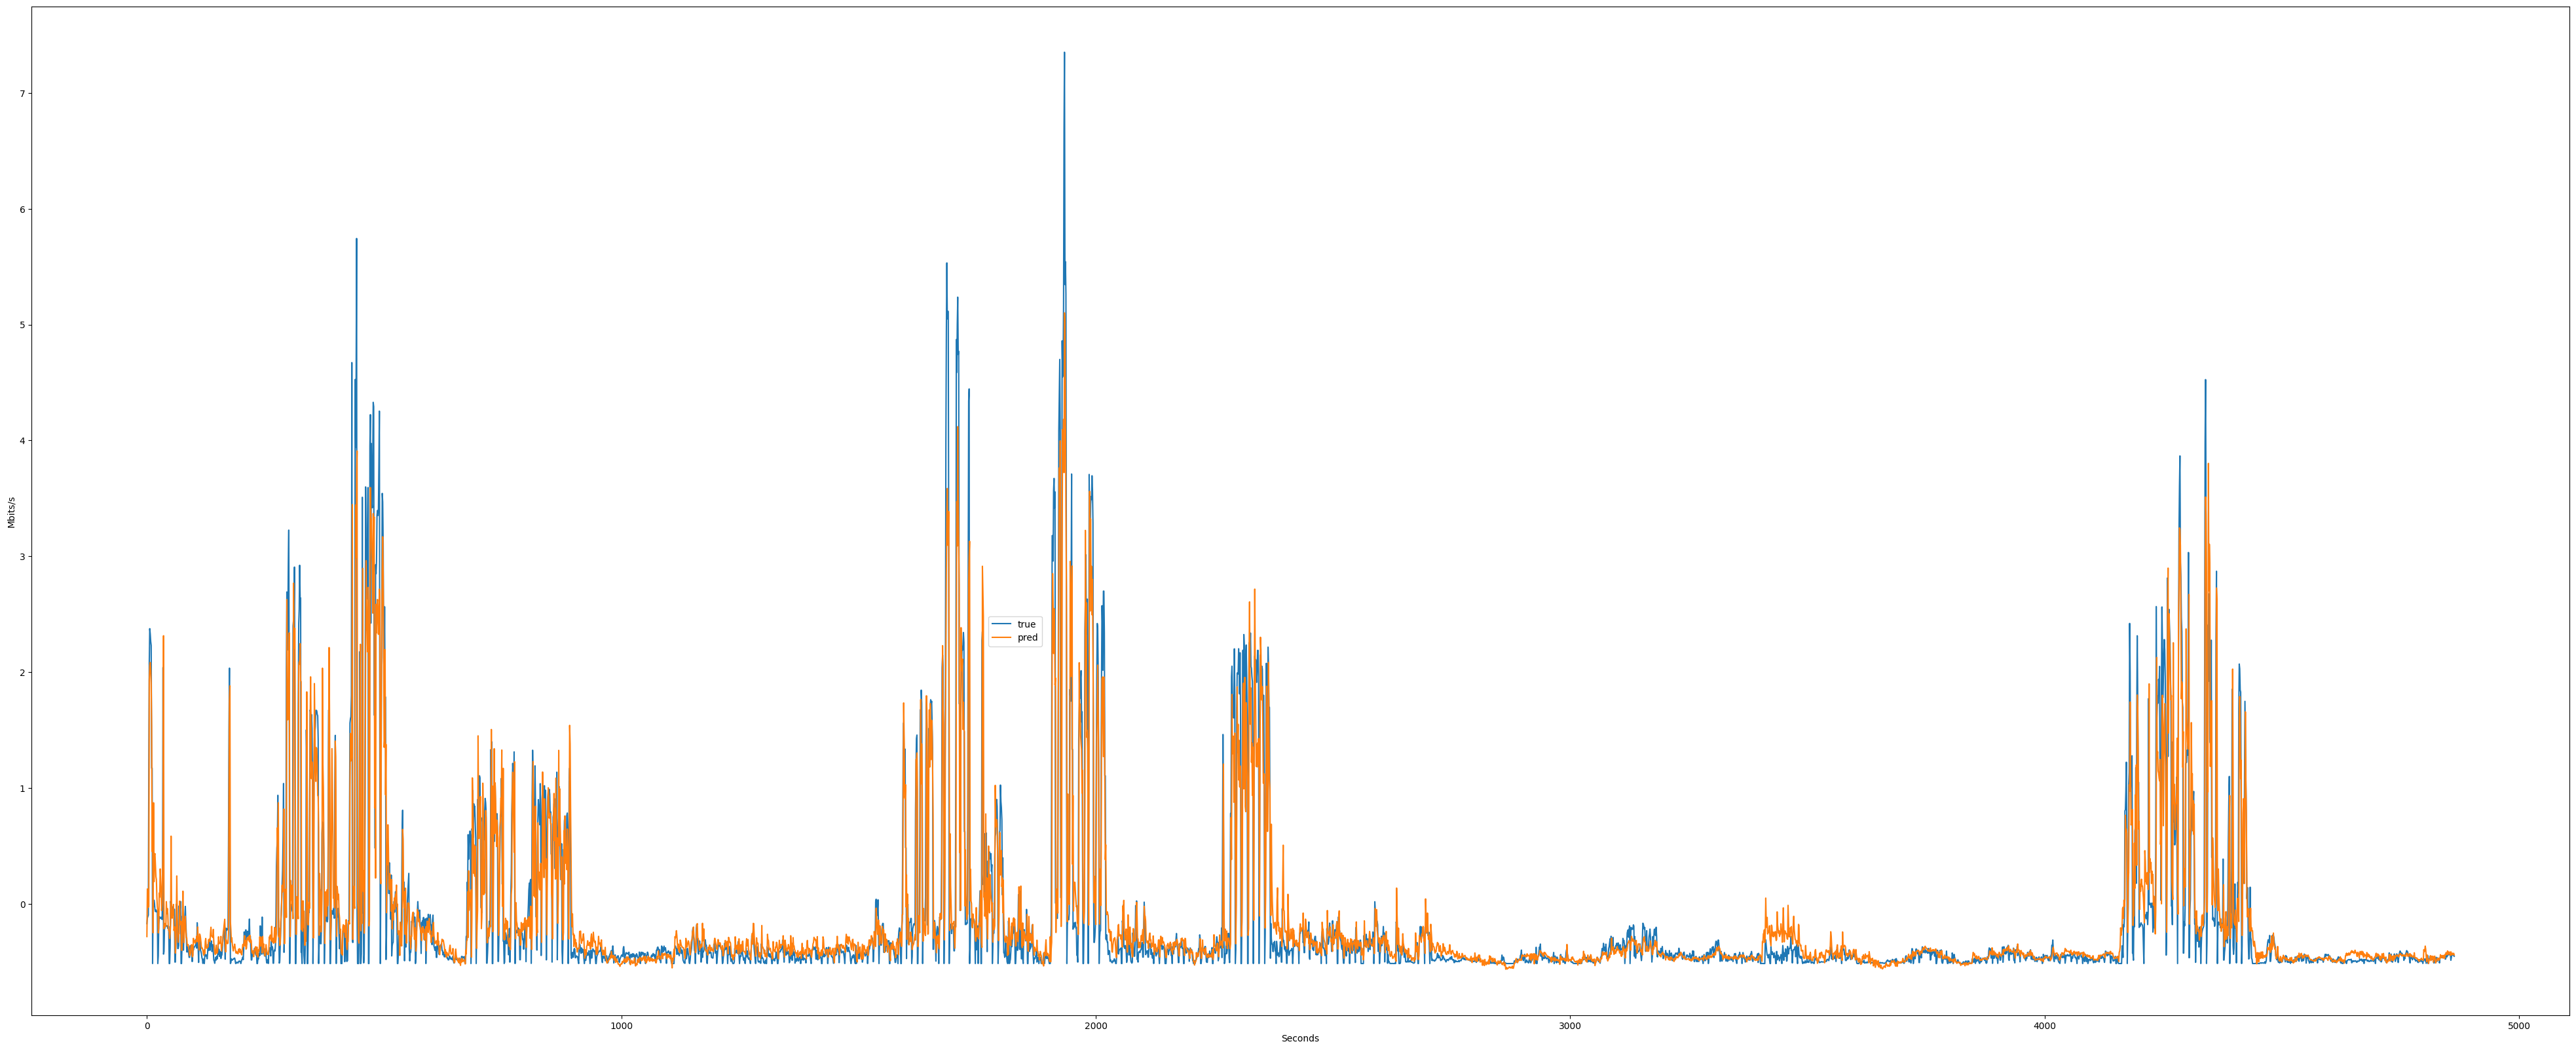

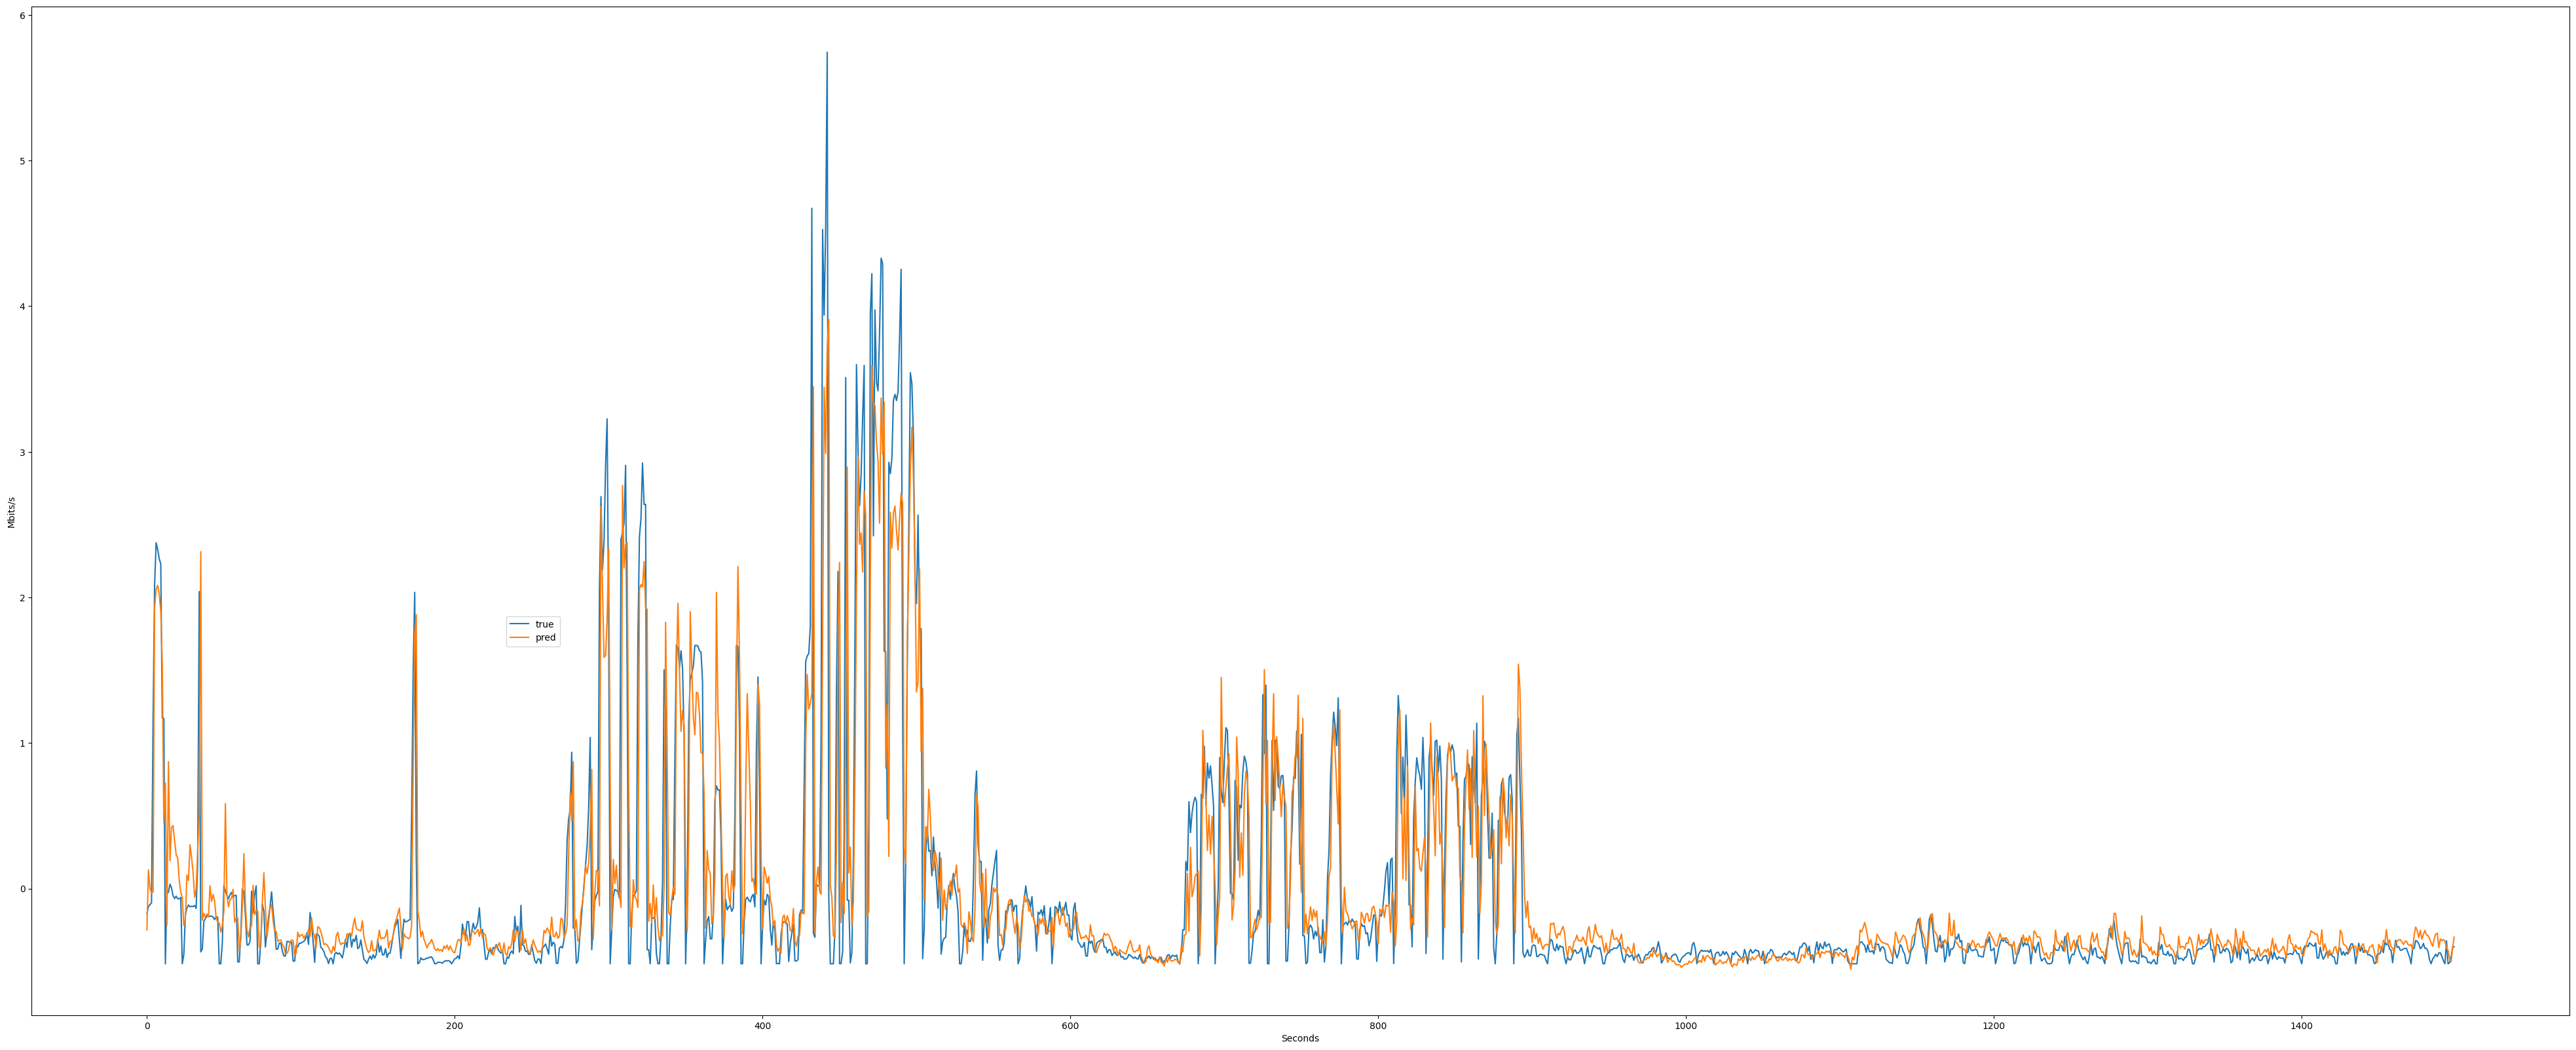

In [47]:
UNIVARIATE = True
if UNIVARIATE:
    df = pd.DataFrame({'true': true.flatten(), 'pred': pred.flatten()})

    df.plot(figsize=(50, 20))
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel('Mbits/s')
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.4, 0.4))
    plt.savefig(f'plots/{DATA}-full.pdf', bbox_inches='tight')

    df.head(1500).plot(figsize=(50, 20))
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel('Mbits/s')
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.21, 0.4))
    plt.savefig(f'plots/{DATA}-1500.pdf', bbox_inches='tight')  


In [48]:
MULTI_VARIATE = False
if MULTI_VARIATE:
    df_true_0 = pd.DataFrame.from_records(df_true.iloc[0])
    df_pred_0 = pd.DataFrame.from_records(df_pred.iloc[0])

    plt.figure(figsize=(16, 8), dpi=150)

    df_true_0.plot(subplots=True, label='true')
    df_pred_0.plot(subplots=True, label='pred')

    plt.title('Informer Multivariate')
    # adding Label to the x-axis
    #plt.xlabel('Years')
    # adding legend to the curve
    plt.legend()